In [18]:
import keras
import numpy
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

plt.style.use('default')

# Database

In [19]:
arquivo = 'viskositas_data.csv'
dados = pandas.read_csv(arquivo, delimiter=';')
dados

# chemical composition in %mass
# temperature (T) in °C
# viscosity (N) in Pa.s

,CaO,SiO2,MgO,Al2O3,TiO2,MnO,FeO,CaF2,Na2O,Li2O,B2O3,K2O,ZrO2,Fe2O3,P2O5,NiO,SO3,Cr2O3,V2O5,T,N
0,28.800000,39.8,2.28,28.500000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,1400.00,2.550
1,28.800000,39.8,2.28,28.500000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,1450.00,1.590
2,28.800000,39.8,2.28,28.500000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,1500.00,1.050
3,28.800000,39.8,2.28,28.500000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,1550.00,0.720
4,28.800000,39.8,2.28,28.500000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,1600.00,0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,31.001362,0.0,0.00,36.047474,0.0,0.0,32.951164,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,1614.85,0.246
3273,31.001362,0.0,0.00,36.047474,0.0,0.0,32.951164,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,1589.85,0.288
3274,31.001362,0.0,0.00,36.047474,0.0,0.0,32.951164,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,1570.85,0.378
3275,31.001362,0.0,0.00,36.047474,0.0,0.0,32.951164,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,1549.85,0.489


In [20]:
# data description 
dados.describe()

,CaO,SiO2,MgO,Al2O3,TiO2,MnO,FeO,CaF2,Na2O,Li2O,B2O3,K2O,ZrO2,Fe2O3,P2O5,NiO,SO3,Cr2O3,V2O5,T,N
count,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.00000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.000000,3277.0,3277.000000,3277.0,3277.000000,3277.000000,3277.000000,3.277000e+03
mean,27.122288,38.203472,3.355917,13.583573,2.765154,2.859448,5.82634,1.058871,0.695791,0.024449,0.253995,0.239704,0.001221,3.626966,0.0,0.011739,0.0,0.032220,0.085657,1564.012725,3.093896e+09
std,11.908040,16.318460,4.469476,9.715535,8.085311,9.152726,13.93131,4.097929,2.214104,0.283533,1.669121,1.310380,0.034921,14.456750,0.0,0.094536,0.0,0.283721,0.624903,175.055375,1.346216e+11
min,2.400015,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,739.050000,2.000000e-03
25%,16.569558,31.835070,0.000000,5.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1448.950000,2.700000e-01
50%,28.410000,37.941576,1.000000,14.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1550.000000,7.020000e-01
75%,36.550000,47.220000,5.000000,20.023980,0.000000,0.000000,2.44000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1723.000000,2.760640e+00
max,78.000000,75.600000,22.500000,52.858705,43.000000,56.000000,85.10000,34.600000,20.000000,8.000000,31.020000,20.000000,1.000000,85.100440,0.0,1.168336,0.0,3.427881,7.177669,1923.000000,7.413102e+12


In [21]:
# data info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CaO     3277 non-null   float64
 1   SiO2    3277 non-null   float64
 2   MgO     3277 non-null   float64
 3   Al2O3   3277 non-null   float64
 4   TiO2    3277 non-null   float64
 5   MnO     3277 non-null   float64
 6   FeO     3277 non-null   float64
 7   CaF2    3277 non-null   float64
 8   Na2O    3277 non-null   float64
 9   Li2O    3277 non-null   float64
 10  B2O3    3277 non-null   float64
 11  K2O     3277 non-null   float64
 12  ZrO2    3277 non-null   int64  
 13  Fe2O3   3277 non-null   float64
 14  P2O5    3277 non-null   int64  
 15  NiO     3277 non-null   float64
 16  SO3     3277 non-null   int64  
 17  Cr2O3   3277 non-null   float64
 18  V2O5    3277 non-null   float64
 19  T       3277 non-null   float64
 20  N       3277 non-null   float64
dtypes: float64(18), int64(3)
memory usage

# Data Preprocessing

In [22]:
# NBO/T — depolymerisation parameter
# http://dx.doi.org/10.2355/isijinternational.ISIJINT-2015-364

dados = pandas.read_csv(arquivo, delimiter=';')
dados = dados.drop(['N', 'T'], axis=1)

cao, sio2, al2o3, mgo = 56.0774, 72.1704, 101.9612, 40.3044
tio2, mno, feo, caf2 = 79.8658, 70.9374, 71.8444, 78.0748
na2o, li2o, b2o3, k2o = 54.9886, 38.9398, 69.6202, 94.1960
zro2, fe2o3, p2o5, nio =  123.2228, 199.5608, 191.944, 74.6928
so3, cr2o3, v2o5 = 80.03, 151.99, 181.88

dados['CaO'], dados['SiO2'] = dados['CaO']/cao, dados['SiO2']/sio2
dados['Al2O3'], dados['MgO'] = dados['Al2O3']/al2o3, dados['MgO']/mgo
dados['TiO2'], dados['MnO'] = dados['TiO2']/tio2, dados['MnO']/mno
dados['FeO'], dados['CaF2'] = dados['FeO']/feo, dados['CaF2']/caf2
dados['Na2O'], dados['Li2O'] = dados['Na2O']/na2o, dados['Li2O']/li2o
dados['B2O3'], dados['K2O'] = dados['B2O3']/b2o3, dados['K2O']/k2o
dados['ZrO2'], dados['Fe2O3'] = dados['ZrO2']/zro2, dados['Fe2O3']/fe2o3
dados['P2O5'], dados['NiO'] = dados['P2O5']/p2o5, dados['NiO']/nio
dados['SO3'], dados['Cr2O3'] = dados['SO3']/so3, dados['Cr2O3']/cr2o3
dados['V2O5'] = dados['V2O5']/v2o5

dados = dados.values

a1 = []
for i in range(0, len(dados)):        
    a1 = a1 + [dados[i].sum()]
    for j in range(0, len(dados[i])):
        dados[i][j] = dados[i][j]/ a1[i]

colRename = {0:'CaO', 1:'SiO2', 2:'MgO', 3:'Al2O3', 4:'TiO2', 5:'MnO',
6:'FeO', 7:'CaF2', 8:'Na2O', 9:'Li2O', 10:'B2O3', 11:'K2O',
12:'ZrO2', 13:'Fe2O3', 14:'P2O5', 15:'NiO', 16:'SO3', 17:'Cr2O3', 18:'V2O5'}

dados = pandas.DataFrame(dados)
dados = dados.rename(columns = colRename)

nbot = 2*(dados['CaO'] + dados['MgO'] + dados['MnO'] + dados['FeO'] + dados['NiO']\
+ dados['Na2O'] + dados['Li2O'] + dados['K2O'] \
- (dados['Al2O3'] + dados['B2O3'] + dados['Fe2O3'] + dados['Cr2O3'])) / \
(dados['SiO2'] + dados['ZrO2'] + dados['TiO2']\
- 2*(dados['Al2O3'] + dados['B2O3'] + dados['Fe2O3'] + dados['Cr2O3']))
pandas.DataFrame(nbot, columns=['NBO/T'])

,NBO/T
0,-76.849375
1,-76.849375
2,-76.849375
3,-76.849375
4,-76.849375
...,...
3272,-1.860991
3273,-1.860991
3274,-1.860991
3275,-1.860991


In [23]:
# Tliq — liquidus temperature
# http://dx.doi.org/10.2355/isijinternational.ISIJINT-2015-364

dados = pandas.read_csv(arquivo, delimiter=';')
dados = dados.drop(['N', 'T'], axis=1).values

a1 = []
for i in range(0, len(dados)):
    a1 = a1 + [dados[i].sum()]
    for j in range(0, len(dados[i])):
        dados[i][j] = dados[i][j]/ a1[i]

dados = pandas.DataFrame(dados)
dados = dados.rename(columns = colRename)
dados = 100*dados

tliq = 1473 + 2.59*(dados['CaO'] + (1-(38/78))*dados['CaF2']) - 1.518*dados['SiO2'] - 1.51*dados['Al2O3'] \
- 11.71*dados['MgO'] - 9.06*dados['Na2O'] - 6*dados['K2O'] + 18*dados['Li2O'] \
- 9.87*dados['FeO'] - 2.12*dados['MnO'] + 4.8*(dados['CaF2']*(38/78))
pandas.DataFrame(tliq, columns=['Tliq'])

,Tliq
0,1417.095190
1,1417.095190
2,1417.095190
3,1417.095190
4,1417.095190
...,...
3272,1173.633852
3273,1173.633852
3274,1173.633852
3275,1173.633852


In [24]:
# chemical composition
dados = pandas.read_csv(arquivo, delimiter=';')
dados_N = pandas.DataFrame(dados['N'])
dados_T = pandas.DataFrame(dados['T']) + 273.15
dados = dados.drop(['N', 'T'], axis=1).values

a1 = []
for i in range(0, len(dados)):
    a1 = a1 + [dados[i].sum()]
    for j in range(0, len(dados[i])):
        dados[i][j] = dados[i][j]/ a1[i]

dados = pandas.DataFrame(dados)
dados = pandas.concat([dados.round(4), dados_T, dados_N], axis=1)
dados = dados.rename(columns = colRename)
pandas.DataFrame(dados)

,CaO,SiO2,MgO,Al2O3,TiO2,MnO,FeO,CaF2,Na2O,Li2O,B2O3,K2O,ZrO2,Fe2O3,P2O5,NiO,SO3,Cr2O3,V2O5,T,N
0,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1673.15,2.550
1,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1723.15,1.590
2,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1773.15,1.050
3,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.15,0.720
4,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1873.15,0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,0.3100,0.0000,0.0000,0.3605,0.0,0.0,0.3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1888.00,0.246
3273,0.3100,0.0000,0.0000,0.3605,0.0,0.0,0.3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1863.00,0.288
3274,0.3100,0.0000,0.0000,0.3605,0.0,0.0,0.3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1844.00,0.378
3275,0.3100,0.0000,0.0000,0.3605,0.0,0.0,0.3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.00,0.489


In [25]:
# data refining

dados.insert(loc = len(dados.columns)-1, column = 'Tliq',
value = tliq, allow_duplicates = False)

dados.insert(loc = len(dados.columns)-1, column = 'NBO/T',
value = nbot, allow_duplicates = False)

dados = dados[-200 < dados['NBO/T']]
dados = dados[dados['NBO/T'] < 200]

dados['N'] = numpy.log(dados['N'])
dados = dados[dados['N'] < numpy.log(10**4)]

dados = dados[dados['T'] > dados['Tliq']]
dados = dados.drop(['P2O5', 'SO3'], axis=1)

dados.drop_duplicates(keep = False, inplace = True)

pandas.DataFrame(dados)

# refining data:
# chemical composition in mass fraction
# temperature (T) in K
# viscosity (N) in Pa.s

,CaO,SiO2,MgO,Al2O3,TiO2,MnO,FeO,CaF2,Na2O,Li2O,B2O3,K2O,ZrO2,Fe2O3,NiO,Cr2O3,V2O5,T,Tliq,NBO/T,N
0,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1673.15,1417.095190,-76.849375,0.936093
1,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1723.15,1417.095190,-76.849375,0.463734
2,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1773.15,1417.095190,-76.849375,0.048790
3,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.15,1417.095190,-76.849375,-0.328504
4,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1873.15,1417.095190,-76.849375,-0.597837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,0.3100,0.0000,0.0000,0.3605,0.0,0.0,0.3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1888.00,1173.633852,-1.860991,-1.402424
3273,0.3100,0.0000,0.0000,0.3605,0.0,0.0,0.3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1863.00,1173.633852,-1.860991,-1.244795
3274,0.3100,0.0000,0.0000,0.3605,0.0,0.0,0.3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1844.00,1173.633852,-1.860991,-0.972861
3275,0.3100,0.0000,0.0000,0.3605,0.0,0.0,0.3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.00,1173.633852,-1.860991,-0.715393


# Train and Test data

In [26]:
x_total = dados.iloc[0:len(dados), 0:len(dados.columns) - 1]
x_banco_dados = x_total
y_total = dados.iloc[0:len(dados), len(dados.columns) - 1:len(dados.columns)]

# x variables (chemical composition (mass fraction) and temperature (K))
x_total

,CaO,SiO2,MgO,Al2O3,TiO2,MnO,FeO,CaF2,Na2O,Li2O,B2O3,K2O,ZrO2,Fe2O3,NiO,Cr2O3,V2O5,T,Tliq,NBO/T
0,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1673.15,1417.095190,-76.849375
1,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1723.15,1417.095190,-76.849375
2,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1773.15,1417.095190,-76.849375
3,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.15,1417.095190,-76.849375
4,0.2898,0.4005,0.0229,0.2868,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1873.15,1417.095190,-76.849375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,0.3100,0.0000,0.0000,0.3605,0.0,0.0,0.3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1888.00,1173.633852,-1.860991
3273,0.3100,0.0000,0.0000,0.3605,0.0,0.0,0.3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1863.00,1173.633852,-1.860991
3274,0.3100,0.0000,0.0000,0.3605,0.0,0.0,0.3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1844.00,1173.633852,-1.860991
3275,0.3100,0.0000,0.0000,0.3605,0.0,0.0,0.3295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1823.00,1173.633852,-1.860991


In [27]:
# target variable (viscosity (Pa.s))
numpy.exp(y_total)

,N
0,2.550
1,1.590
2,1.050
3,0.720
4,0.550
...,...
3272,0.246
3273,0.288
3274,0.378
3275,0.489


In [28]:
# standarnization
x_total = (x_total - x_total.mean()) / x_total.std()
x, xt, y, yt = train_test_split(x_total, y_total, test_size = 0.1, random_state = 37)

# VISKOSITAS FULL model

In [33]:
# VISKOSITAS FULL neural network
modelo = keras.models.load_model('VISKOSITAS_Full_Model.h5')

In [34]:
# evaluation
# evaluation — test data
print(f'THE MAPE is {round(modelo.evaluate(xt, yt)[1], 4)} log η (η in Pa.s)')
print(f'The standard deviation is {round(abs(modelo.predict(xt)-yt).std()[0], 4)} log η (η in Pa.s)')

# SEE MAPE (MeanAbsolutePercentageError class) in https://keras.io/api/losses/regression_losses/

10/10 [==============================] - 0s 2ms/step - loss: 0.0821 - mean_absolute_error: 0.1225
THE MAPE is 0.1225 log η (η in Pa.s)
The standard deviation is 0.2595 log η (η in Pa.s)


#### MAPE = 0.1225 log η (log = logₑ) ⇒ exp(0.1225) = 1.1303.
#### This MAPE presents a error of 13.03% in the prediction, this demonstrates that VISKOSITAS FULL has higher average accuracy than experimental methods such as Rotational, Falling Body, Electric Vibration, Rod Elongation, Rod Bending, Isothermal Deformation, Squeeze Film and Penetrating Rod (Vargas, Frandsen and Dam-Johansen, 2001).

# Visualization

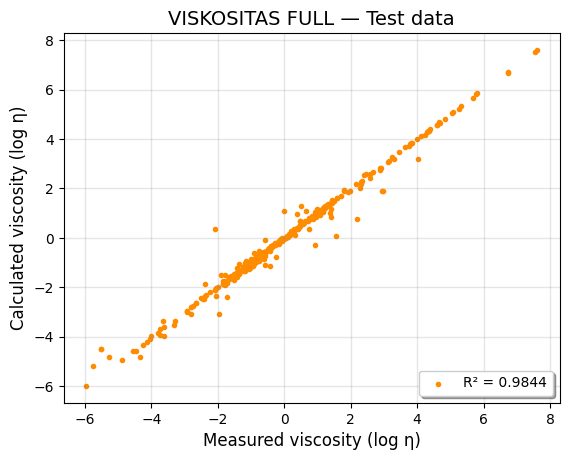

In [38]:
# visualization — evaluate test data

plt.scatter(x = yt, y = modelo.predict(xt),
label = f'R² = {round(r2_score(yt, modelo.predict(xt)), 4)}',
marker = '.', color = 'darkorange')
plt.xlabel('Measured viscosity (log η)', size = 12)
plt.ylabel('Calculated viscosity (log η)', size = 12)
plt.legend(loc = 'lower right', shadow = True)
plt.title('VISKOSITAS FULL — Test data', size=14)
plt.grid(alpha = 0.2, color = 'grey', linewidth = 1, linestyle = '-')
plt.show()

# Contact and Reference

In [ ]:
"""
Contact:

E-mail: patrick.dosanjos@outlook.com
Linkedin: https://www.linkedin.com/in/patrick-queiroz-dos-anjos/

Reference

Mills, K.C., Karagadde, S., Lee, P.D., Yuan, L., Shahbazian, F.
Calculation of Physical Properties for Use in Models of Continuous Casting Process Part 1 Mould Slags.
ISIJ International. v. 56. n. 2, p. 264-273, 2016.

S. Vargas, F.J. Frandsen, K. Dam-Johansen
Rheological properties of high-temperature melts of coal ashes and other silicates.
Progress in Energy and Combustion Science 27 (2001) 237±429.
"""